<h1><center> Project - PCA and Clustering </center> </h1>
<h2><center> COMPSCI X415.2 Intro to Data Science </center> </h2>
<h2><center> UC Berkeley - Extension </center> </h2>
<h3><center>    Prashant Chopalli </center> </h3>


## Introduction
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit. The data is collected as part of the call campaign made to customer regarding a deposit offer

### Research Questions ###
+ Reduction of feature variables using PCA and Cluster the dataset 



<h3> Data Source </h3>

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.

Client data:
+ age (numeric)
+ job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
  "blue-collar","self-employed","retired","technician","services")
+ marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
+ education (categorical: "unknown","secondary","primary","tertiary")
+ default: has credit in default? (binary: "yes","no")
+ balance: average yearly balance, in euros (numeric)
+ housing: has housing loan? (binary: "yes","no")
+ loan: has personal loan? (binary: "yes","no")

Attributes for the last contact of the current campaign:
+ contact: contact communication type (categorical: "unknown","telephone","cellular")
+ day: last contact day of the month (numeric)
+ month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
+ duration: last contact duration, in seconds (numeric)

Other attributes:
+ campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
+ pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client     was not previously contacted)
+ previous: number of contacts performed before this campaign and for this client (numeric)
+ poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Target variable:
+ Has the client subscribed a term deposit? (binary: "yes","no")

<p> <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#">Original Data Source from UCI Repository. The dataset bank-full.csv was used for this project</a></p>

## Data Description

In [1]:
# Import the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read the data file
df=pd.read_csv('bank.csv')

In [3]:
# Display the first 5 entries of the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Display the rows and columns of the dataframe 
df.shape

(45211, 17)

In [5]:
# Check if the target variable has any null values
df['Target'].isnull().value_counts()

False    45211
Name: Target, dtype: int64

In [6]:
# Numerical summaries of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
# Show the datatypes of the columns
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
# Conversion function to convert the variables to integer or numeric form 
# Marital status: Married = 1 , Single =2 and Divorced =3
# Education ("unknown"=4,"secondary"=2,"primary"=1,"tertiary"=3)
# Default: has credit in default? ( "yes"=1,"no"=0)
# Housing: has housing loan? ( "yes"=1,"no"=0)
# Loan: has personal loan? ( "yes"=1,"no"=0)
# Contact: contact communication type ("unknown"=3,"telephone"=2,"cellular"=1)
# Poutcome: outcome of the previous marketing campaign ( "unknown"=3,"other"=2,"failure"=0,"success"=1)

def marital(x):
    if x=='married':
        x=1
    elif x=='single':
        x=2
    elif x=='divorced':
        x=3
    return x

def education(x):
    if x=='primary':
        x=1
    elif x=='secondary':
        x=2
    elif x=='tertiary':
        x=3
    elif x=='unknown':
          x=4
    return x


def outcome(x):
    if x=='failure':
        x=0
    elif x=='success':
        x=1
    elif x=='other':
        x=2
    elif x=='unknown':
        x=3
    return x

def convert(x):
    if x=='no':
        x=0
    elif x=='yes':
        x=1
    return x

def contact(x):
    if x=='cellular':
        x=1
    elif x=='telephone':
        x=2
    elif x=='unknown':
        x=3
    return x

def job(x):
    if x=='blue-collar':
        x=1
    elif x=='management':
        x=2
    elif x=='technician':
        x=3
    elif x=='admin.':
        x=4
    elif x=='services':
        x=5
    elif x=='retired':
        x=6
    elif x=='self-employed':
        x=7
    elif x=='entrepreneur':
        x=8
    elif x=='unemployed':
        x=9
    elif x=='housemaid':
        x=10
    elif x=='student':
        x=11
    elif x=='unknown':
        x=0
    return x

def balance(x):
    if x<0:
        x=0
    return x

# Apply functions to feature columns and convert to type int
df['marital']=df['marital'].apply(marital)
df['marital'].astype('int64').dtypes

df['education']=df['education'].apply(education)
df['education'].astype('int64').dtypes

df['default']=df['default'].apply(convert)
df['default'].astype('int64').dtypes

df['housing']=df['housing'].apply(convert)
df['housing'].astype('int64').dtypes

df['loan']=df['loan'].apply(convert)
df['loan'].astype('int64').dtypes

df['contact']=df['contact'].apply(contact)
df['contact'].astype('int64').dtypes

df['poutcome']=df['poutcome'].apply(outcome)
df['poutcome'].astype('int64').dtypes

df['job']=df['job'].apply(job)
df['job'].astype('int64').dtypes

df['balance']= df['balance'].apply(balance)

df['Target']=df['Target'].apply(convert)
df['Target'].astype('int64').dtypes


dtype('int64')

In [9]:
# Check to see if the features have any null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

## Graphical Summaries

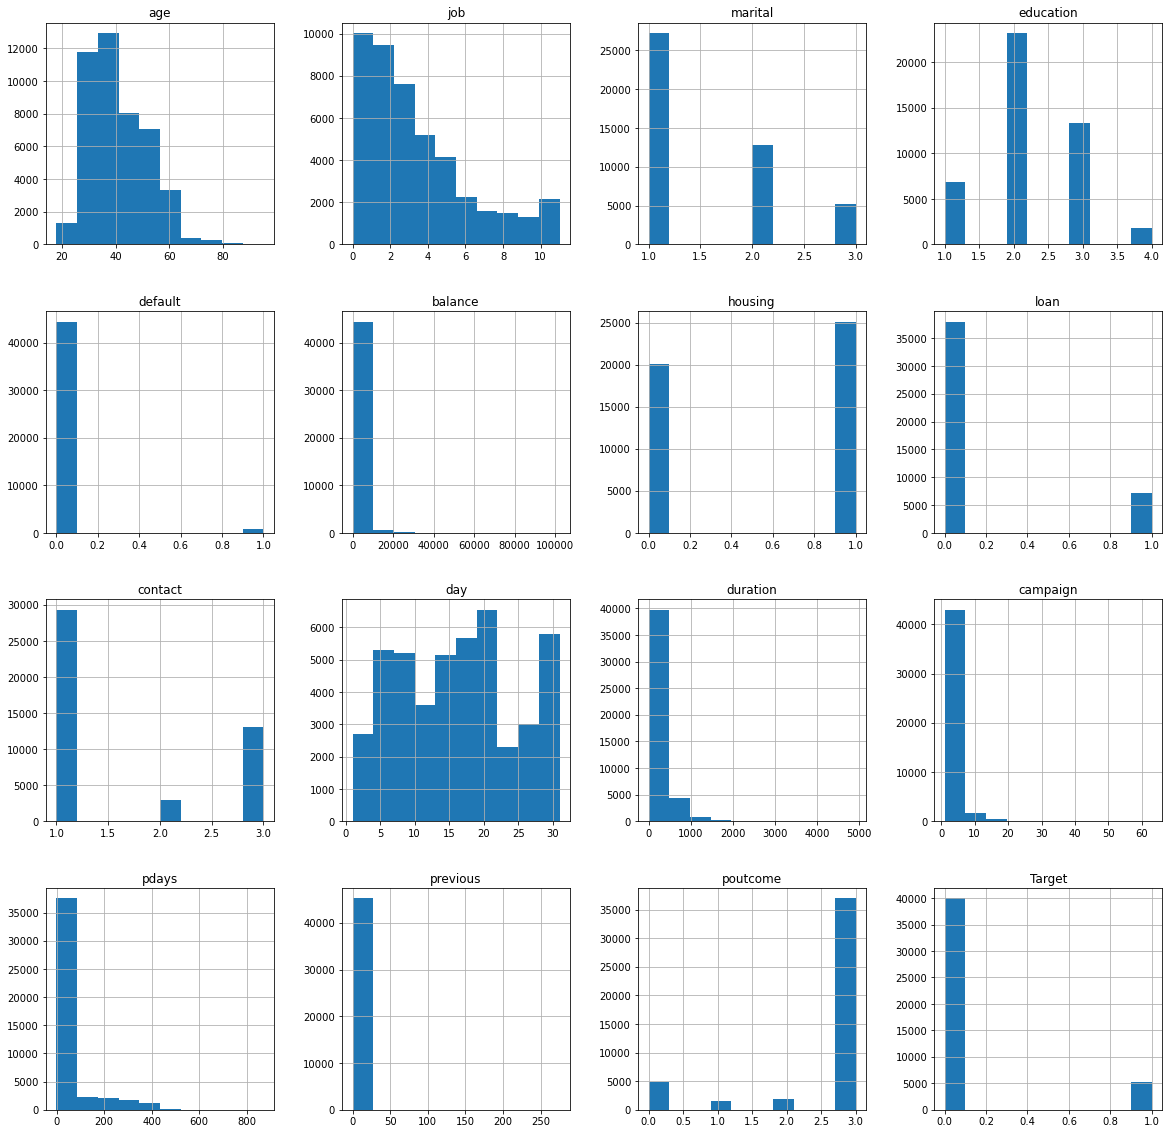

In [10]:
# Display histogram for the features
%matplotlib inline
df.hist(figsize=(20,20))
plt.show()

#### Observations from the data analysis
+ Most customer have a secondary education
+ Most calls were between 0-500 seconds
+ Most customers didn't have an existing loan
+ Most of customer called have atleast an Secondary Education
+ Most of the customer were called on the cellular phone

### Prepare the dataset
<p></p>

In [11]:
# Divide the data into dataset with relevant features and dataset for taget variable. The month variables is not used
x=df[['age','job','marital', 'education','default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration','campaign', 'pdays',
       'previous', 'poutcome']]



### Principal Component Reduction

In [12]:
# Import the libraries for PCA
from sklearn.decomposition import PCA

# Scale the data, transform the data
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

# Reduce the variables to 2 and transform the data
pca=PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
print('PCA Components ', pca.components_)
print("Variance", pca.explained_variance_)
print('Variance Ratio', pca.explained_variance_ratio_)



PCA Components  [[-0.02481334  0.00262343  0.02537452  0.04000614 -0.04304099  0.02276379
   0.06521788 -0.02736619 -0.2705902  -0.10458814  0.01412938 -0.11703871
   0.58654332  0.44365886 -0.59231611]
 [ 0.38107804  0.36475636 -0.02607576  0.21690652 -0.10423853  0.31257174
  -0.6214487  -0.20245855 -0.35182801  0.08189231  0.02612275  0.03688713
  -0.07167725 -0.02006124  0.01329659]]
Variance [2.34722749 1.39479331]
Variance Ratio [0.15647837 0.09298416]


#### Observation
* Only ~ 25% (15+9) of the variance is explained by the 2 components which is less than 80% for a good estimate

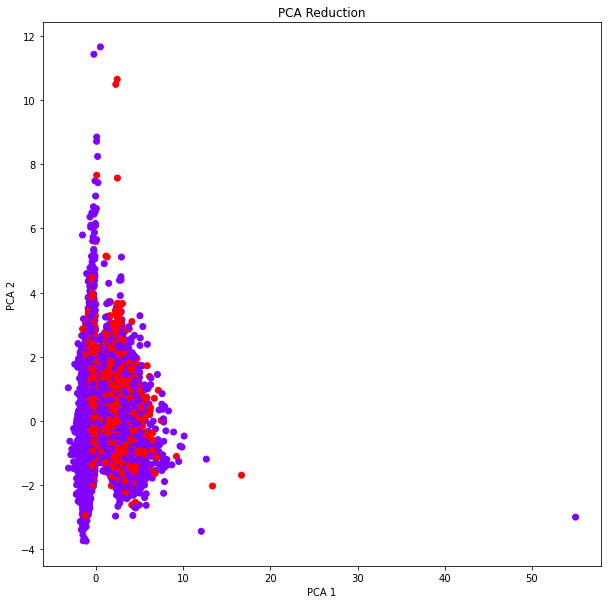

In [13]:
# Visualization for the PCA components
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title('PCA Reduction')
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Target'],cmap='rainbow')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

#### Hopkins stats to check the clusterability of the data

In [14]:
# Install the pyclusterend library
%pip install pyclustertend
from pyclustertend import hopkins


Note: you may need to restart the kernel to use updated packages.


In [15]:
#Get the library for the Hopkins score
from sklearn.cluster import KMeans
print("Hopkins Score is ", hopkins(x,200))


Hopkins Score is  0.023420236778116364


#### Observation
* Hopkins score is ~ 0.024 , this is less than the desired 0.5 which means the data is not very clusterable

#### Create the Clusters

In [16]:
# Import the KMeans library
from sklearn.cluster import KMeans
# Create the cluster, fit and predict the data
kmeans_cluster = KMeans(n_clusters=6)
kmeans_pattern = kmeans_cluster.fit_predict(x)
print(kmeans_pattern)
kmeans_cluster.cluster_centers_

[5 5 5 ... 4 1 0]


array([[-7.07087676e-02, -3.16055119e-03,  4.10020181e-02,
         7.60406631e-02, -1.35489888e-01,  4.20968669e-02,
         2.02804866e-01, -5.90535118e-02, -6.18750253e-01,
        -2.04999364e-01, -5.92243364e-02, -2.27941994e-01,
         1.95455579e+00,  1.17014515e+00, -2.06771176e+00],
       [ 1.08810590e+00,  4.10585431e-01, -4.11270516e-01,
        -2.69690460e-01, -1.35489888e-01,  3.37295789e-01,
        -8.53538230e-01, -5.30059781e-02, -2.80960251e-01,
         2.19062020e-01, -2.25700259e-01,  3.43666096e-01,
        -3.70592491e-01, -2.15361811e-01,  3.80764822e-01],
       [-1.31960428e-01, -6.62310771e-03,  1.35832724e-01,
        -7.91032456e-02,  7.38062461e+00, -4.21525477e-01,
        -4.44698749e-02,  5.70036940e-01,  1.13692176e-01,
         6.95542616e-02, -7.39646442e-02,  1.24153409e-01,
        -2.21266410e-01, -1.35282456e-01,  2.69723664e-01],
       [-4.92309849e-01, -8.24383806e-02,  1.99593688e-01,
         2.43637597e-01, -1.35489888e-01, -1.11113333

#### Silhoutte score for Clusterability 

In [17]:
# Import the library for silhouette score
from sklearn.metrics import silhouette_score
print(silhouette_score(x, kmeans_pattern))

0.12301589020254532


#### Observation
* Silhoutte score is ~ 0.12 , this should be closer to 1 for clusterability, which means the data is not very clusterable

#### Elbow method to determine the optimal number of clusters

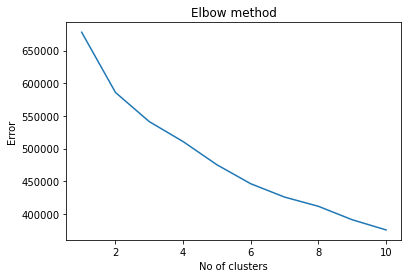

In [18]:
# Create list to get the errors
elbow=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)

# Plot the erros to get the value of cluster
plt.plot(range(1, 11), elbow)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

#### Observation
* The optimal cluster is 2 , as this is the point where the plot is forming the elbow structure

#### Create clusters with clusters =2 

In [19]:
from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=2)
kmeans_pattern = kmeans_cluster.fit_predict(x)
print(kmeans_pattern)
centers=kmeans_cluster.cluster_centers_

[0 0 0 ... 1 0 1]


In [20]:
# Display the Centroids
print(centers)

[[ 1.24770611e-03 -4.24349244e-03 -7.77419266e-03 -1.37377384e-02
   1.76284767e-02 -1.33432502e-02 -3.31603307e-02  1.45935001e-02
   1.31087792e-01  4.09532534e-02 -2.39268393e-03  4.92679384e-02
  -4.05993183e-01 -2.45275130e-01  4.32536703e-01]
 [-5.84432818e-03  1.98767661e-02  3.64147719e-02  6.43483682e-02
  -8.25728131e-02  6.25005623e-02  1.55324923e-01 -6.83568059e-02
  -6.14022866e-01 -1.91827428e-01  1.12074711e-02 -2.30773898e-01
   1.90169575e+00  1.14888302e+00 -2.02602715e+00]]


<function matplotlib.pyplot.show(close=None, block=None)>

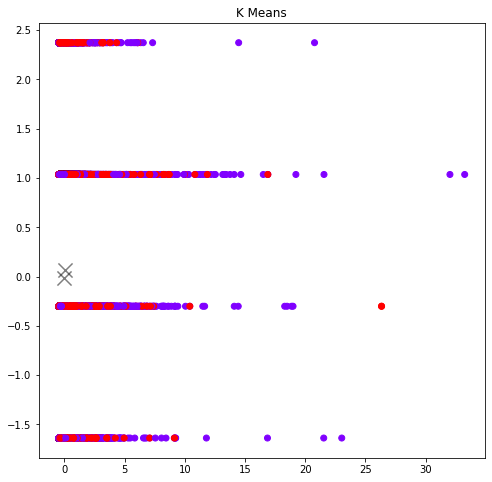

In [21]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.title('K Means')
plt.scatter(x[:, 5], x[:, 3], c=kmeans_pattern, cmap='rainbow')
plt.scatter(centers[:, 5], centers[:,3], c='black', s=200, alpha=0.5,marker='x')
plt.show

## Conclusion 
<p> We were able to apply PCA and reduce the feature variables to 2, however the Hopkins and Silhoute score suggest that the dataset is not clusterable. We applied the K means cluster to the data set but didn't achieve a good cluster distinction. 